In [1]:
#!pip install tensorflow

  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
  Rolling back uninstall of protobuf
  Moving to c:\users\prach\anaconda3\lib\site-packages\protobuf-3.20.1-py3.9.egg-info
   from C:\Users\prach\anaconda3\Lib\site-packages\~rotobuf-3.20.1-py3.9.egg-info


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\prach\\anaconda3\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
#pip install opencv-python

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
import cv2
import pickle
import warnings
warnings.filterwarnings("ignore")


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import DenseNet121

In [2]:
df = pd.read_csv("./styles.csv", nrows=6000, error_bad_lines=False)
df['image'] = df.apply(lambda x: str(x['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
print(df.shape)
df.head(5)

(6000, 11)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [3]:
Dataframe = pd.DataFrame({
    'image_name': df['image'],
    'type': df['articleType']
})

# total number of entries in the dataframe
total_row = len(Dataframe)
print('total row count: ', total_row)

Dataframe.head(10)

total row count:  6000


,filename,type
0,15970.jpg,Shirts
1,39386.jpg,Jeans
2,59263.jpg,Watches
3,21379.jpg,Track Pants
4,53759.jpg,Tshirts
5,1855.jpg,Tshirts
6,30805.jpg,Shirts
7,26960.jpg,Shirts
8,29114.jpg,Socks
9,30039.jpg,Watches


In [4]:
unique_types = Dataframe['type'].unique().tolist()
total_class = len(unique_types)
print(total_class)
print(unique_types)
print(unique_types[0])
print(unique_types.index(unique_types[0]))
Dataframe['number_types'] = Dataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)
Dataframe.head(10)

117
['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks', 'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra', 'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant', 'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas', 'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees', 'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests', 'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket', 'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains', 'Duffel Bag', 'Sports Sandals', 'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear', 'Shoe Laces', 'Fragrance Gift Set', 'Bangle', 'Nightdress', 'Ties', 'Baby Dolls', 'Legging

,filename,type,number_types
0,15970.jpg,Shirts,0
1,39386.jpg,Jeans,1
2,59263.jpg,Watches,2
3,21379.jpg,Track Pants,3
4,53759.jpg,Tshirts,4
5,1855.jpg,Tshirts,4
6,30805.jpg,Shirts,0
7,26960.jpg,Shirts,0
8,29114.jpg,Socks,5
9,30039.jpg,Watches,2


In [5]:
Dataframe['type'].value_counts()

Tshirts             900
Shirts              417
Casual Shoes        375
Watches             366
Sports Shoes        311
                   ... 
Trolley Bag           1
Beauty Accessory      1
Water Bottle          1
Shrug                 1
Jeggings              1
Name: type, Length: 117, dtype: int64

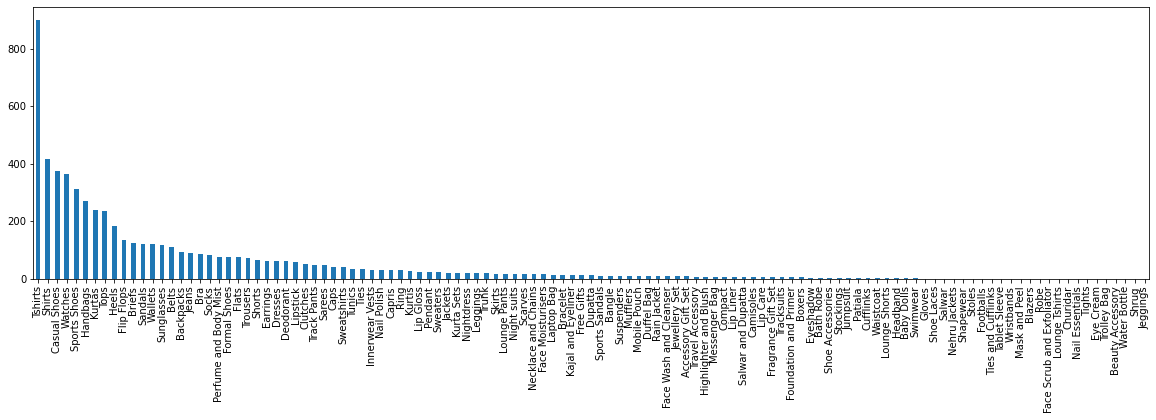

In [6]:
plt.figure(figsize=(20,5))
Dataframe['type'].value_counts().plot(kind='bar',x='type',y='image_name')
plt.show()

In [42]:
import os
DATASET_PATH = "./fashion-dataset/"
list_directory = os.listdir(DATASET_PATH)
# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break
def getData(start,stop):
    x_data = []
    y_data = []
    #start = 0 #setting start parameter
    #stop = int(0.001*total_row) #setting stop parameter 
    
    for i in range(start, stop): 
        Image_path=DATASET_PATH+list_directory[index]+"/"+Dataframe.loc[i,'image_name']
        #print(Dataframe.loc[i,'image_name'])
        image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
        try:
            resized_img = cv2.resize(image, dsize=(28, 28))
        except:
            print("Rejected Image: "+Dataframe.loc[i,'image_name'])
            continue
        x_data.append(resized_img) 
        y_values = Dataframe.loc[i,'number_types'] # earlier it was type
        y_data.append(y_values)
                
    return x_data, y_data

15970.jpg
39386.jpg
59263.jpg
21379.jpg
53759.jpg
1855.jpg
<class 'list'>
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255  26  22  27  53
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255  48  20  25  56  37  28
  186 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255  36  53 183 207 154  43
   29 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 171 137 160 169 223 140
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 203 200 230 211 192 197
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 182 200 213 187 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255  70 178 154 207 115 255
  255 255 255 255 255 255 255 255

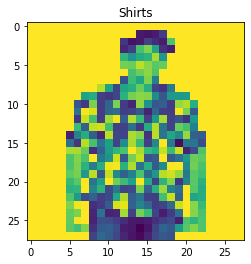

In [43]:
X=[]
Y=[]
# for now start=0,stop=(0.001*total_row)
# total_row=count of rows in augmented data frame
start = 0
stop = int(0.001*total_row) # testing with 0.1% image of the dataset
X,Y=getData(start,stop)

print(type(X))
print(X[0])
plt.title(unique_types[Y[0]])
plt.imshow(X[0])

In [9]:
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)

In [10]:
X = X/255.0

In [11]:
Y = Y.reshape(len(X),)

In [12]:
print(type(X))
print(X.shape)
print(Y.shape)
print(X[0])
print(Y[0])

<class 'numpy.ndarray'>
(6, 28, 28, 1)
(6,)
[[[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.10196078]
  [0.08627451]
  [0.10588235]
  [0.20784314]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.  

In [13]:
X=[]
Y=[]
start = 0
stop = total_row
X,Y=getData(start,stop)

# conversion into numpy array
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)

# normalizing
X = X/255

# processing Y_train for dimension matching
Y = Y.reshape(len(X),)

In [14]:
print('Image Data Shape: ',X.shape)
print('Label Data Shape: ',Y.shape)

Image Data Shape:  (6000, 28, 28, 1)
Label Data Shape:  (6000,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 500)
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Test Image Data Shape: ',X_test.shape)
print('Test Label Data Shape: ',Y_test.shape)

Train Image Data Shape:  (5400, 28, 28, 1)
Train Label Data Shape:  (5400,)
Test Image Data Shape:  (600, 28, 28, 1)
Test Label Data Shape:  (600,)


In [16]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 500)
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Validation Image Data Shape: ',X_validate.shape)
print('Validation Label Data Shape: ',Y_validate.shape)

Train Image Data Shape:  (4860, 28, 28, 1)
Train Label Data Shape:  (4860,)
Validation Image Data Shape:  (540, 28, 28, 1)
Validation Label Data Shape:  (540,)


In [17]:
#CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

In [18]:
def build_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(units = 512, activation = 'relu'))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Dense(units = total_class, activation = 'softmax'))
    return cnn_model


model=build_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [19]:
def train_model(model):
    model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 500, verbose = 1, validation_data = (X_validate, Y_validate))
#     model.fit(X_train, Y_train, epochs=50, batch_size=512, validation_split=0.2)

train_model(model)

Epoch 1/500
38/38 [==============================] - 4s 67ms/step - loss: 3.8733 - accuracy: 0.1237 - val_loss: 3.8189 - val_accuracy: 0.1500
Epoch 2/500
38/38 [==============================] - 2s 62ms/step - loss: 3.5686 - accuracy: 0.1595 - val_loss: 3.5275 - val_accuracy: 0.1889
Epoch 3/500
38/38 [==============================] - 2s 62ms/step - loss: 3.1877 - accuracy: 0.2082 - val_loss: 3.0486 - val_accuracy: 0.2500
Epoch 4/500
38/38 [==============================] - 3s 70ms/step - loss: 2.8327 - accuracy: 0.2623 - val_loss: 2.6853 - val_accuracy: 0.3130
Epoch 5/500
38/38 [==============================] - 3s 69ms/step - loss: 2.5495 - accuracy: 0.3066 - val_loss: 2.4188 - val_accuracy: 0.3741
Epoch 6/500
38/38 [==============================] - 2s 66ms/step - loss: 2.3404 - accuracy: 0.3463 - val_loss: 2.2296 - val_accuracy: 0.4167
Epoch 7/500
38/38 [==============================] - 3s 77ms/step - loss: 2.1805 - accuracy: 0.3885 - val_loss: 2.0626 - val_accuracy: 0.4593
Epoch 

Text(0.5, 1.0, 'Accuracy evolution')

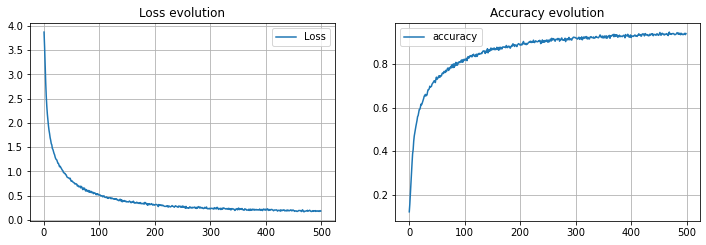

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['loss'], label='Loss')
# plt.plot(model.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['accuracy'], label='accuracy')
# plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')


In [21]:
model.save('visual_product_recommend.h5')

In [22]:
from keras import models
model = models.load_model('visual_product_recommend.h5')

In [23]:
#predicted_classes = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

19/19 [==============================] - 0s 5ms/step


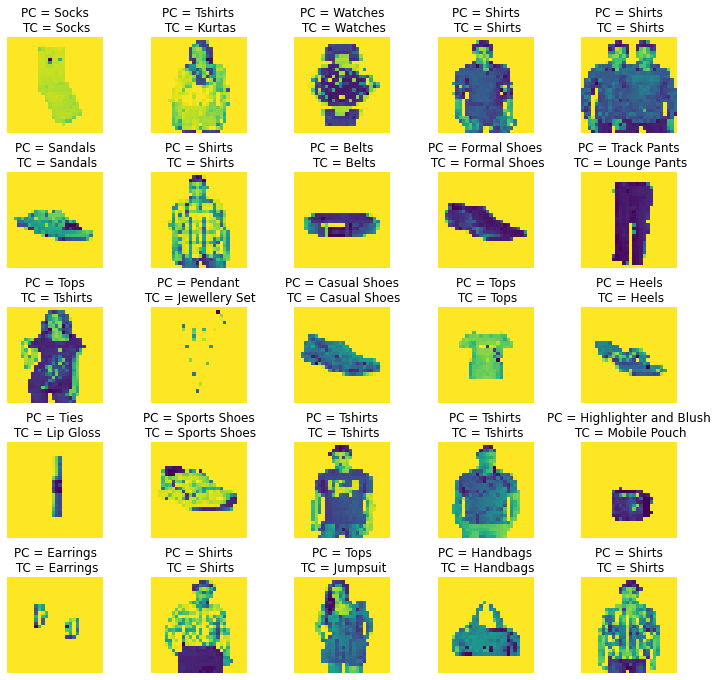

In [31]:
#PC=PredictedClass #TC=TrueClass
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"PC = {unique_types[predicted_classes[i]]}\n TC = {unique_types[Y_test[i]]}") #predicted_classes[i]:0.1f #Y_test[i]:0.1f
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

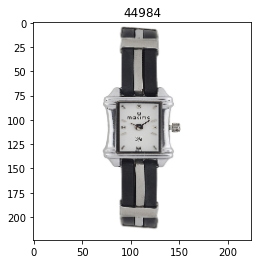

In [33]:
#Dataframe.head(10)
def load_image(i):
    Image_path=DATASET_PATH+list_directory[index]+"/"+Dataframe.loc[i,'image_name']
    Image_id=Dataframe.loc[i,'image_name'].split(".")
    res=Image_id[0]
    image = cv2.imread(Image_path,cv2.IMREAD_COLOR)
    resized_img = cv2.resize(image, dsize=(224, 224))
    return resized_img,res
img,img_id = load_image(50)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title(img_id)
plt.imshow(img)

In [35]:
def make_prediction(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    resized_img = cv2.resize(img, dsize=(28, 28))
    x_data = np.array(resized_img).reshape(-1, 28,28,1)
    x_data=x_data/255
#     print(x_data)
#     print(x_data.shape)
    result=model.predict(x_data)
#     print(type(result))
#     print(np.argmax(result))
    return x_data,unique_types[np.argmax(result)]

numpy_image,result=make_prediction(img)
print(result)

1/1 [==============================] - 0s 25ms/step
Watches


In [36]:
typeList=[]
for i, row in df.iterrows(): 
    if(row["articleType"]==result):
        #print(row["id"],row["articleType"])
        if(img_id!=str(row["id"])):
            typeList.append(row['id'])
            
            
print(typeList) 

[59263, 30039, 29928, 17429, 51658, 23278, 11188, 45258, 44970, 22950, 13841, 8110, 43190, 32335, 56670, 36795, 40527, 45869, 4716, 26351, 29917, 43164, 45293, 36761, 37481, 8117, 39375, 59290, 52678, 39711, 36759, 44977, 29745, 44983, 59264, 43163, 36766, 45294, 30001, 29910, 4711, 40520, 37472, 51660, 43197, 56677, 32332, 36792, 45260, 46418, 5068, 45893, 36905, 47992, 17418, 29919, 59252, 45269, 40529, 52671, 23282, 46427, 43155, 23276, 51656, 40516, 32304, 45256, 21713, 29926, 30037, 17427, 53565, 43199, 59255, 38050, 47995, 36902, 37488, 10098, 36768, 17420, 10605, 53562, 52682, 29921, 32303, 45251, 23271, 51651, 40511, 36757, 46420, 43152, 23285, 44979, 58942, 30064, 49890, 26333, 45037, 10235, 40545, 46480, 45205, 32357, 46474, 25314, 30090, 49864, 32368, 45008, 38004, 41038, 22932, 28434, 30097, 49863, 46473, 25313, 33878, 46487, 45202, 32350, 45030, 40542, 26334, 30063, 49897, 59239, 22935, 28433, 38003, 25325, 41036, 49855, 17445, 30055, 29944, 45234, 32366, 51634, 45006, 814

Text(0.5, 1.0, '59263')

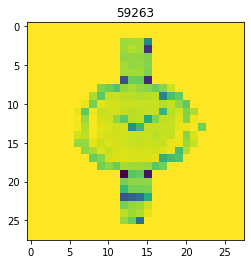

In [37]:
i=0
X_similar=[]
X_id_similar=[]
X_numpy=[]
for imageId in typeList:
#     print(imageId)
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(imageId)+".jpg"
    image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
    try:
        resized_img = cv2.resize(image, dsize=(28,28))
    except:
        print("can't read file: ", str(imageId)+".jpg")
    X_similar.append(resized_img)
    X_id_similar.append(imageId)
        
X_numpy = np.array(X_similar).reshape(-1, 28,28,1)
X_numpy = X_numpy/255
#print(X_numpy[0])

plt.imshow(X_similar[0])
plt.title(X_id_similar[0])

In [38]:
#Recommendation
import math
def calculateDistance(i1, i2):
    return math.sqrt(np.sum((i1-i2)**2))

print(calculateDistance(numpy_image,X_numpy[0]))

5.898992152888367


In [39]:
distance_list=[]
for i in range (0, len(X_numpy)):
    distance_list.append(calculateDistance(numpy_image,X_numpy[i]))

sorted_distance_list=distance_list.copy()
#print(distance_list)
sorted_distance_list.sort()

least_ten_distance=sorted_distance_list[0:10]
print(least_ten_distance)
index_distance=[]
for i in range (0, len(least_ten_distance)-1):
    if(least_ten_distance[i]!=least_ten_distance[i+1]):
        index_distance.append(distance_list.index(least_ten_distance[i]))

index_distance=index_distance[0:5]

print(index_distance)

[3.869519291375653, 4.722088109003131, 5.041256929979251, 5.091975277440661, 5.104612654996928, 5.150941206177405, 5.200932989379442, 5.326073490248648, 5.391244129524203, 5.432163883741279]
[102, 128, 316, 98, 287]


59263
30039
29928
17429
51658


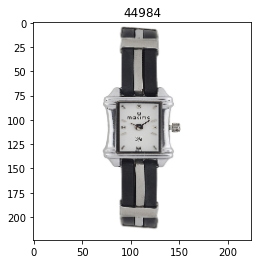

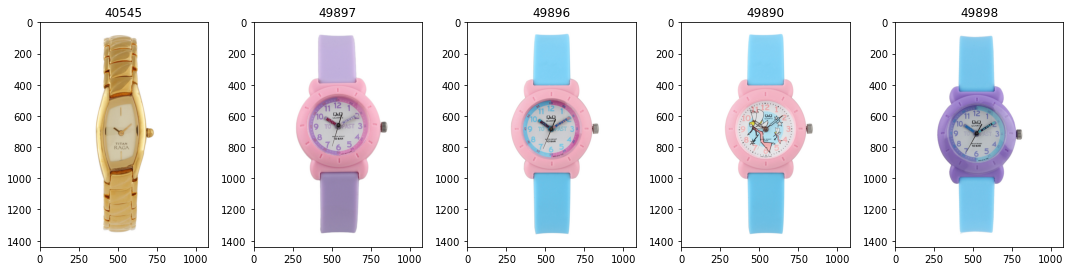

In [40]:
# Image_path=DATASET_PATH+list_directory[index]+"/"+str(img_id)+".jpg"
# src = cv2.imread(Image_path)
# image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.title(img_id)

fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
for i in range(0,len(index_distance)):
    print(X_id_similar[i])
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(X_id_similar[index_distance[i]])+".jpg"
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(1,5, i+1))
    subplot_title=str(X_id_similar[index_distance[i]])
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)
    
fig.tight_layout()
plt.show()